In [1]:
import scipy.optimize as opt
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import random
from scipy.stats import norm
from numpy.random import standard_normal
from pandas.plotting import scatter_matrix
import yfinance as yf
import datetime






In [2]:
#Question No. 1
N = 10000 #number of points

a = 2.0 #lower bound
b = 5.0 #upper bound
# an array of N points uniformly distributed between a=2 and b5

x = np.random.uniform(a , b , N)
#making a variable for exponent

e = np.exp(x)
f_x = np.sin(e)
I_hat = ( b - a ) * np.mean(f_x)
print("Estimate of I = ",I_hat)

Estimate of I =  0.05011646977863939


In [33]:
#Question No.2: RANDOM WALKS WITH BOUNDARIES

def getStep():
    step = np.random.randint(2)
    #if step==0:
     #   step=-1
    return step




def takeSteps():
    pos = []
    N50_l = []
    for i in range(10000):
        N = 0
        N50 = 0
        for j in range(1000):
            s = getStep()
            if s==0:
                N = N-1
            elif s==1:
                if N==50:
                    N=49
                else:
                    N = N+1
                    if N == 50:
                        N50 = N50 +1
        pos.append(N)
        N50_l.append(N50)
    
    return np.mean(pos), np.std(pos), np.mean(N50_l), np.std(N50_l)
    
        
    
    
            
            
    
    
    

In [34]:
stats = takeSteps()
print("Mean position:", stats[0])
print("Standard deviation of position:", stats[1])
print("Average number of times walker hit 50:", stats[2])
print("Standard deviation:", stats[3])

Mean position: -1.447
Standard deviation of position: 29.17913280068481
Average number of times walker hit 50: 1.49
Standard deviation: 5.56716265255471


In [9]:
# Question 3



import csv

# csv file name
filename = "/Users/mishalmalik/Downloads/AAPL.csv"

In [10]:
df= pd.read_csv(filename)


In [11]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.120391,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117774,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112539,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107741,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105561,39827200


In [12]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])

only_2018 = df[df['Date'].dt.year == 2018]

In [ ]:
only_2018.head()

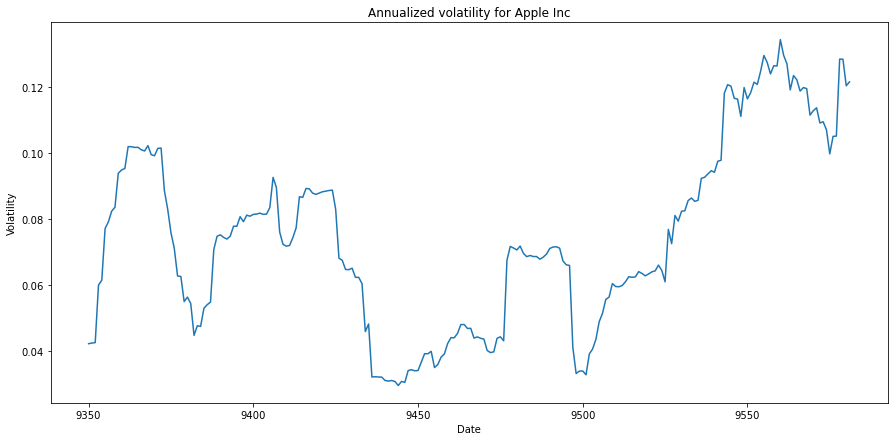

In [30]:
window_size = 20
Adj_Close = only_2018['Adj Close']
returns = np.log( Adj_Close / Adj_Close.shift(1) )
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=window_size).std()*np.sqrt(window_size)
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for Apple Inc')
plt.show()

In [37]:

#Question 4: Stock Pricing


def get_gbm( mu , sigma , T , S0 , N):
    t = np.linspace(0,T,N,True)
    W = np.random.standard_normal(N)
    dt = T/(N-1)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu-0.5*sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S


mu = 0.1
sigma = 0.2
T = 1.0 # years
S0 = 20 #initial prices
N = 5 #nodes
time_l = 10000
asset_price = np.empty([time_l])
for time_line in range(time_l):
    S=get_gbm(mu,sigma,T,S0,N)
    asset_price[time_line]=S[-1]

In [38]:
len(asset_price)

10000

In [39]:
fa = asset_price 
for i in range(len(fa)):
    if fa[i] - 22 < 0 or fa[i] - 22 >1:
        fa[i] = 0
    else:
        fa[i] = fa[i] - 22


check = np.where(fa>0)
len(check[0])

787

In [29]:
Payoff=fa
Payoff_mean=Payoff.mean()
print("Value of option when risk free rate is 0: ",Payoff_mean)

Value of option when risk free rate is 0:  0.03539501527588076
